In [1]:
import sys
import os
home=os.getcwd()
sys.path.append(home+'/Functions')
from ChargeDataSet import *
from MS_L_IDs import *
from ShowDF import *
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
from AllMS2Data import *
from ms2_spectrum import *
from Cosine_2Spectra import *
from PlotSpec import *
from All_ms2_spectra import *
from Retrieve_csv_ms2Spectra import *
from Similarity_AdjacencyMatrix import *
from AdjacencyList_from_matrix import *
from ms2_feat_modules import *
from MS_L_IDs import *
from feat_ms2_Gauss import *
from ms2_SpectralRedundancy import *
from ShowPop import *

In [5]:
DataSetName='12212.mzML'
DataSet=ChargeDataSet(DataSetName)
MS1IDVec=MS_L_IDs(DataSet=DataSet,Level=1,min_RT=0,max_RT=1500)
SummMS2=ms2_SpectralRedundancy(SummaryFile='12212mzML-ms2Summary.xlsx',min_mz=250,max_mz=260,cos_tol=0.6)
np.shape((SummMS2))
ms2_featuresDF=feat_ms2_Gauss(DataSet=DataSet,SummMS2=SummMS2,MS1IDVec=MS1IDVec,mz_std=2e-3,MS2_to_MS1_ratio=10,stdDistance=3,MaxCount=3,Points_for_regression=5,minSignals=7)
ms2_featuresDF=ms2_featuresDF[(-ms2_featuresDF[:,5]).argsort(),:]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [12]:
DataSetName='P210.mzML'
DataSet=ChargeDataSet(DataSetName)
MS1IDVec=MS_L_IDs(DataSet=DataSet,Level=1,min_RT=0,max_RT=1500)

In [33]:
mz=351.2874
mz_std=0.0001

In [62]:
from ExtractAllRawPeaks import *
AllRawPeaks=ExtractAllRawPeaks(MS1IDVec=MS1IDVec,DataSet=DataSet,height=1e1,distance=2,min_RT=0,max_RT=1000,min_mz=300,max_mz=400)
AllRawPeaks=AllRawPeaks[AllRawPeaks[:,2].argsort(),:]

In [35]:
np.mean(AllRawPeaks[Fil,0])

351.11140403883314

In [34]:
Fil=(AllRawPeaks[:,2]>335)&(AllRawPeaks[:,2]<350)
ShowDF(AllRawPeaks[Fil,:])

,0,1,2
0,351.78,193.864,335.235
1,350.96,547.932,335.235
2,350.811,234.256,335.235
3,351.898,511.993,335.235
4,350.18,6746.93,335.235
5,351.689,254.058,335.235
6,350.534,231,335.235
7,350.712,486.42,335.235
8,350.579,572.758,335.235
9,350.41,148,335.235


In [83]:
from MaxIntChromatogram import *
from SplitChromatogram import *
def AllSubChromatograms(mz,mz_std,AllRawPeaks,stdDistance=3,RT_tol=5,minSignals=5,minInt=0.1):
    ChromatogramList=[]
    Chromatogram0=MaxIntChromatogram(mz=mz,mz_std=mz_std,AllRawPeaks=AllRawPeaks,stdDistance=stdDistance)
    ChromatogramList=SplitChromatogram(Chromatogram0=Chromatogram0,RT_tol=RT_tol,minSignals=minSignals,minInt=minInt)
    return ChromatogramList

In [84]:
import pandas as pd
#from AllSubChromatograms import *
from ResolvingGaussianChromatogram import *
from GaussianParametersTable import *
ChromatogramList=AllSubChromatograms(mz=mz,mz_std=mz_std,AllRawPeaks=AllRawPeaks,stdDistance=3,RT_tol=5,minSignals=3)
GaussianParametersList=[]
for Chromatogram in ChromatogramList:
    GaussianParameters=ResolvingGaussianChromatogram(Chromatogram=Chromatogram,RT_col=2,int_col=1,MaxSignals=100,distance=2)
    if len(GaussianParameters)>0:
        GaussianParametersList.append([GaussianParamechromMters,Chromatogram])

/home/edwin/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [100]:
ShowDF(GaussianParametersList[2][0]/60)

,0,1,2
0,5.5712,0.0123657,2540.63
1,5.69262,0.0184876,6404.28
2,5.71386,0.00872939,4016.11


In [98]:
np.sum(GaussianParametersList[2][0][1:,2])/60

10420.386935388358

,0,1,2
0,12.063,0.0611103,1170.77


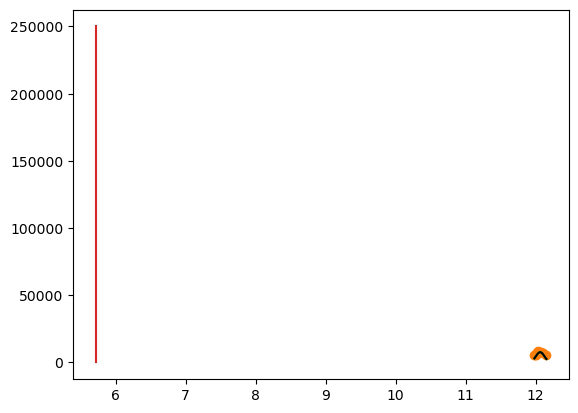

,0,1,2
0,5.8744,0.00979169,5641.38
1,5.90211,0.0149408,3998.47
2,5.90464,0.0144218,5333.01


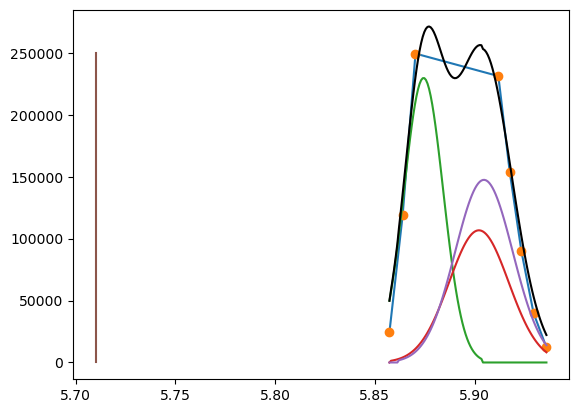

,0,1,2
0,5.5712,0.0123657,2540.63
1,5.69262,0.0184876,6404.28
2,5.71386,0.00872939,4016.11


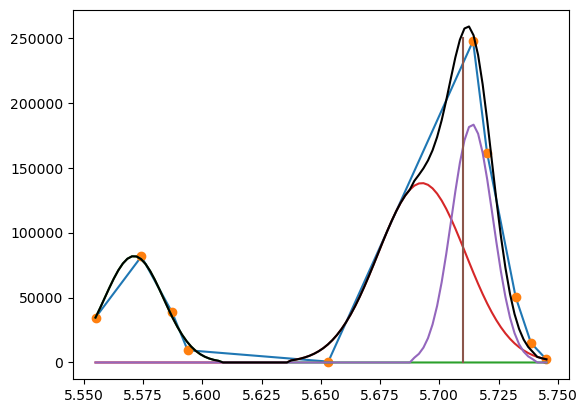

In [106]:
from OverlappingGaussPeaks import *
    
for chromM in GaussianParametersList:
    chrom=chromM[1]
    min_RT=min(chrom[:,2])
    max_RT=max(chrom[:,2])
    RT_vec=np.linspace(min_RT,max_RT,100)
    Parameters=chromM[0]
    ShowDF(Parameters/60)
    ChromatogramMatrix=OverlappingGaussPeaks(RT_vec=RT_vec,ParametersMat=Parameters)
    plt.plot(chrom[:,2]/60,chrom[:,1],'-')
    plt.plot(chrom[:,2]/60,chrom[:,1],'o')
    plt.plot(RT_vec/60,ChromatogramMatrix)
    plt.plot(RT_vec/60,sum(ChromatogramMatrix.T),'k-')
    plt.plot([5.71,5.71],[0,250000])
    plt.show()

In [42]:
from MaxIntChromatogram import *
Chromatogram0=MaxIntChromatogram(mz=mz,mz_std=mz_std,AllRawPeaks=AllRawPeaks,stdDistance=3)

In [81]:
import numpy as np
from RT_edges import *
RT_tol=5
minSignals=5
minInt=0.1
edgesVecList=RT_edges(Chromatogram=Chromatogram0,RT_tol=RT_tol)
ChromatogramList=[]
for edges in edgesVecList:
    early_RT=int(edges[0])
    late_RT=int(edges[1])
    #print((late_RT-early_RT))
    if (late_RT-early_RT)>minSignals:
        Chromatogram=Chromatogram0[early_RT:late_RT,:].copy()
        LChrom=len(Chromatogram[:,0])
        MaxInt=np.max(Chromatogram[:,1])
        MaxIntF=MaxInt*minInt/100
        MinIntFil=Chromatogram[:,1]>MaxIntF
        Chromatogram=Chromatogram[MinIntFil,:]
        if len(Chromatogram[:,0])<LChrom:
            Chromatograms=SplitChromatogram(Chromatogram0=Chromatogram,RT_tol=5,minSignals=5,minInt=1)
        else:
            Chromatograms=[Chromatogram]
        ChromatogramList=Chromatograms+ChromatogramList

In [47]:
ShowDF(Chromatogram0[:10,:])


,0,1,2
0,351.287,166.178,85.81
1,351.287,143,130.677
2,351.288,779.422,217.151
3,351.287,365.776,222.776
4,351.287,872.886,253.888
5,351.287,137,273.159
6,351.287,149,278.533
7,351.287,34584.2,333.297
8,351.287,81694.2,334.459
9,351.287,38612.8,335.235


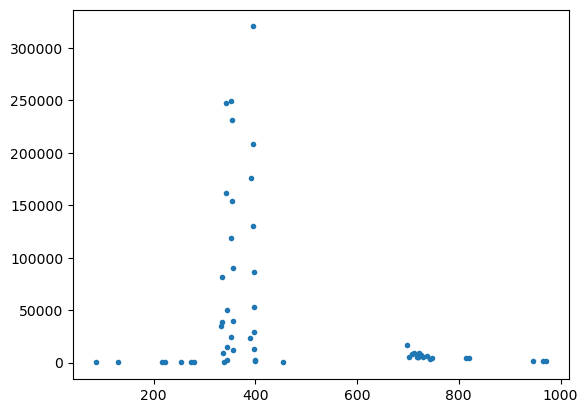

In [75]:
#plt.xlim([337,350])
plt.plot(Chromatogram0[:,2],Chromatogram0[:,1],'.')
plt.show()

In [66]:
for x in GaussianParametersList:
    ShowDF(x[0])

,0,1,2
0,723.779,3.66627,70246


,0,1,2
0,393.798,1.82108,1.30491e+06


,0,1,2
0,352.485,0.600724,348285
1,354.109,0.890518,279765
2,354.359,0.820791,263320


In [3]:
from ExtractAllPeaks import *
AllPeaks=ExtractAllPeaks(MS1IDVec,DataSet,height=1e2,distance=2,min_RT=0,max_RT=1200,min_mz=250,max_mz=270.2)
np.shape(AllPeaks)

(65079, 3)

In [4]:
from mz_Edges import *
edgesVecList,SomePeaks=mz_Edges(AllPeaks=AllPeaks,FractionSample=30,mz_tol=2e-3)

In [5]:
from mz_mz_std_ms1 import *
mz_feat=mz_mz_std_ms1(edgesVecList=edgesVecList,SomePeaks=SomePeaks,stdDistance=3)

In [6]:
from Chrom_ms1Peaks_Summaries import *
ms1_features=[]
FirstFeat=True
for feat in mz_feat:
    mz=feat[0]
    mz_std=feat[1]
    #print(mz,mz_std)
    if mz_std>0:
        ve=Chrom_ms1Peaks_Summaries(mz=mz,mz_std=mz_std,DataSet=DataSet,DataSetName=DataSetName,MS1IDVec=MS1IDVec,AllPeaks=AllPeaks,minSpec=5)
        if len(ve)>0:
            if FirstFeat:
                ms1_features=ve
                FirstFeat=False
            else:
                ms1_features=ms1_features+ve            
ms1_features=np.array(ms1_features)           

/home/edwin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/edwin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/edwin/anaconda3/lib/python3.7/site-packages/scipy/integrate/_quadrature.py:416: RuntimeWarning: divide by zero encountered in true_divide
  y[slice1] * (hsum * hsum / hprod) +
/home/edwin/anaconda3/lib/python3.7/site-packages/scipy/integrate/_quadrature.py:416: RuntimeWarning: invalid value encountered in add
  y[slice1] * (hsum * hsum / hprod) +
/home/edwin/anaconda3/lib/python3.7/site-packages/scipy/integrate/_quadrature.py:414: RuntimeWarning: divide by zero encountered in true_divide
  h0divh1 = h0 / h1
/home/edwin/anaconda3/lib/python3.7/site-packages/scipy/integrate/_quadrature.py:417: RuntimeWarning: invalid value encountered in add
  y[slice2] * (2 - h0divh1))


In [7]:
Loc=(ms1_features[:,0]>200)&(ms1_features[:,0]<360)
ShowDF(ms1_features[Loc,:])

,0,1,2,3,4,5,6,7
0,250.093,0.000799377,250.093,250.094,64.6767,62.0319,64.6767,2146.72
1,250.093,0.000799377,250.093,250.094,65.9916,65.1296,71.4421,6045.99
2,250.093,0.000799377,250.093,250.094,73.1927,71.8742,76.6988,722.269
3,250.093,0.000799377,250.093,250.094,82.4428,81.7129,92.6972,37527.5
4,250.093,0.000799377,250.093,250.094,101.949,93.0669,102.526,12443.1
5,250.093,0.000799377,250.093,250.094,102.889,102.889,119.822,0
6,250.105,0.000300571,250.105,250.105,154.923,113.677,155.21,14098.5
7,250.113,0.000372941,250.113,250.113,143.945,138.225,143.945,9142.66
8,250.113,0.000372941,250.113,250.113,144.643,144.294,147.586,21242.3
9,250.113,0.000372941,250.113,250.113,184.187,152.05,190.842,48219.9


mz= 267.1709
mz_std= 0.002167899383078836
(648, 3)


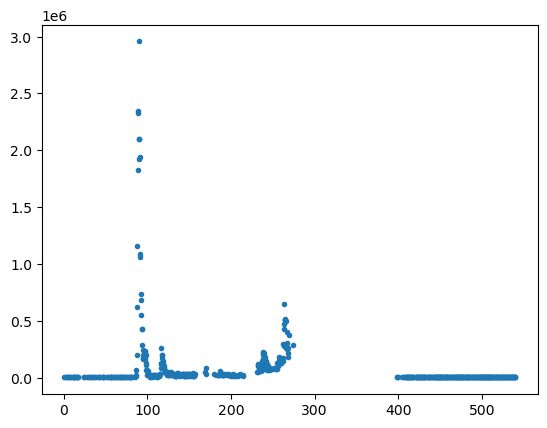

In [8]:
from MaxIntChromatogram import *
loc=200
stdDistance=3
#mz=ms1_features[Loc,:][loc,0]
mz=267.1709
print('mz=',mz)
#mz_std=ms1_features[Loc,:][loc,1]
mz_std=0.002167899383078836
print('mz_std=',mz_std)    
Chromatogram0=MaxIntChromatogram(mz=mz,mz_std=mz_std,AllPeaks=AllPeaks,stdDistance=stdDistance)    
print(np.shape(Chromatogram0))
#plt.xlim([220,260])
#plt.ylim([1e5,2e5])
#Chromatogram0=Chromatogram0[Chromatogram0[:,2].argsort(),:]

#MaxInt=np.max(Chromatogram0[:,1])
#minInt=0
#MaxIntF=MaxInt*minInt/100
#MinIntFil=Chromatogram0[:,1]>MaxIntF
#Chromatogram0=Chromatogram0[MinIntFil,:]
plt.plot(Chromatogram0[:,2],Chromatogram0[:,1],'.')
plt.show()

In [77]:
list(O2OData.columns)[1:9]

['AverageRT_1',
 'StdRT_1',
 'AverageMZ_1',
 'StdMZ_1',
 'l_1',
 'ConfidenceIntervalDa_1',
 'ConfidenceInterval_1',
 'SumInt_1']

In [3]:
TablesFolder='tables/'
O2OData=pd.read_excel(TablesFolder+'P210.mzML.xlsx',index_col=0)
ShowDF(O2OData)

,Pass,AverageRT_1,StdRT_1,AverageMZ_1,StdMZ_1,l_1,ConfidenceIntervalDa_1,ConfidenceInterval_1,SumInt_1,AverageRT_2,StdRT_2,AverageMZ_2,StdMZ_2,l_2,ConfidenceIntervalDa_2,ConfidenceInterval_2,SumInt_2,Difference,ConfidenceInterval,ConfidenceInterval(ppm)_dif,ConfidenceInterval(ppm)_mz1,ConfidenceInterval(ppm)_mz2,tref,stMix
0,0,1.08046,0.0129818,98.9847,8.63847e-05,5,0.000107261,1.08361,6.26287e+06,1.08049,0.0131729,100.989,0.00012797,5,0.000158896,1.5734,55534.5,2.00404,0.000163186,81.4286,1.6486,1.61589,2.36335,6.90487e-05
1,1,1.15335,0.0628063,112.051,0.000121633,18,6.04868e-05,0.539817,843270,1.13532,0.0538214,114.055,0.000187016,18,9.3001e-05,0.815406,547865,2.00419,0.000107513,53.644,0.959501,0.942641,2.04462,5.25831e-05
2,1,1.68845,0.0408895,121.04,0.00018206,15,0.000100821,0.832961,444840,1.7119,0.0415537,123.044,0.000168637,15,9.3388e-05,0.758981,485389,2.0042,0.000131286,65.5055,1.08466,1.06699,2.04895,6.4075e-05
3,0,7.25719,0.00739781,121.175,9.92589e-05,4,0.000157943,1.30343,4.26992e+06,7.257,0.00744695,123.179,0.000150842,4,0.000240023,1.94857,154336,2.00451,0.00022958,114.532,1.89462,1.86379,2.54284,9.02851e-05
4,1,7.26272,0.0137593,121.238,7.92783e-05,8,6.62783e-05,0.546677,2.3348e+06,7.26258,0.0131428,123.243,0.000154692,8,0.000129326,1.04936,133466,2.00418,0.000136154,67.9354,1.12303,1.10477,2.21548,6.14559e-05
5,1,5.84668,0.120695,128.061,0.000438344,8,0.000366465,2.86164,104136,5.8421,0.109655,130.065,0.000220276,8,0.000184156,1.41587,288776,2.00413,0.000384826,192.016,3.00501,2.95871,2.21871,0.000173446
6,1,6.56051,0.0488135,128.061,0.000291731,8,0.000243894,1.9045,125569,6.55583,0.0225471,130.066,0.000117817,8,9.84977e-05,0.757293,1.11925e+06,2.0041,0.000250705,125.096,1.95769,1.92753,2.2538,0.000111236
7,1,7.96145,0.0605229,128.062,0.000366762,13,0.000221632,1.73067,236519,7.96066,0.0557436,130.066,0.000194596,13,0.000117593,0.904108,625147,2.00402,0.00024168,120.597,1.88722,1.85814,2.09878,0.000115153
8,1,7.25384,0.050084,128.062,0.000169505,8,0.00014171,1.10657,511896,7.20491,0.102926,130.066,0.000438853,8,0.00036689,2.8208,287548,2.00396,0.00037599,187.623,2.93599,2.89076,2.26051,0.000166329
9,0,1.28437,0.153439,137.046,9.19149e-05,36,3.10995e-05,0.226928,1.39084e+06,1.24137,0.110999,139.05,0.000158479,36,5.36215e-05,0.385627,1.61712e+06,2.00446,6.11634e-05,30.5136,0.446299,0.439865,2.00312,3.05341e-05


In [4]:
DataSetName='P210.mzML'
DataSet=ChargeDataSet(DataSetName)
MS1IDVec=MS_L_IDs(DataSet=DataSet,Level=1,min_RT=0,max_RT=1500) #This is also in seconds

In [27]:
from ExtractAllRawPeaks import *
RT_tol=10
mz_tol=2
FeaturesTable=O2OData
min_RT=60*np.min(FeaturesTable['AverageRT_1'])-RT_tol #Time in minutes
max_RT=60*np.max(FeaturesTable['AverageRT_1'])+RT_tol
min_mz=np.min(FeaturesTable['AverageMZ_1'])-mz_tol
max_mz=np.max(FeaturesTable['AverageMZ_1'])+mz_tol
AllRawPeaks=ExtractAllRawPeaks(MS1IDVec=MS1IDVec,DataSet=DataSet,height=1e2,distance=2,min_RT=min_RT,max_RT=max_RT,min_mz=min_mz,max_mz=max_mz)
#AllRawPeaks[:,2]=AllRawPeaks[:,2]/60

KeyboardInterrupt: 

In [26]:
ShowDF(AllRawPeaks[101200:101300,:])

,0,1,2
0,774.066,190,8.934
1,774.069,116,6.303
2,774.071,102,14.067
3,774.082,230,5.975
4,774.096,106,3.673
5,774.101,108,4.001
6,774.104,246.346,3.344
7,774.121,114,6.961
8,774.141,237,5.646
9,774.148,224,4.988


In [12]:
DataSetName='P210.mzML'
os.path.exists('Data//'+DataSetName)

True

In [69]:
from Refine_O2O_FeaturesTable_withChromatogram import *
AlignedSamplesDF=Refine_O2O_FeaturesTable_withChromatogram(AlignedSamplesDFName='AlignedFeatures.xlsx',FirstSample=4,mz_tol=5,RT_tol=5)

Missing file: SFC_S1C_11.mzML
Missing file: SFC_S1C_1.mzML
Missing file: SFC_S1_6.mzML
Missing file: SFC_S1C_6.mzML
Missing file: SFC_S1C_5.mzML
Missing file: SFC_S1_11.mzML
Missing file: SFC_S1_1.mzML
0 0
0 0
0 0
[429.82612147] 49887.68171440774
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
[466.31861195] 45242.11743477513
0 0
0 0
[233.13261018] 53245.755528614376
0 0
0 0
[532.16761849] 29730.150937667247
[230.21543402] 12490.835680877532
0 0
[431.75260573] 1314183.3439182902
0 0
0 0
0 0
0 0
0 0
0 0
0 0


/home/edwin/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


/home/edwin/0-GitHubProjects/Codding/feat.-ms2-Gauss/Functions/WeightGauss.py:9: RuntimeWarning: invalid value encountered in true_divide
  Relative_Int=Int_vec/sum_Int


[559.93040432] 95123.90515031377
0 0
[506.34076812] 17299.824035754402
0 0
0 0
0 0
[519.32263692] 8616.18331439856
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
[431.72166969] 13740.199606531796
0 0
0 0
[532.45085803] 10339.074280422068
0 0
0 0
0 0
[531.63947423] 86377.56622158879
0 0
0 0
0 0
[363.73335145] 1559499.6684857642
0 0
0 0
0 0
0 0
0 0
[360.75435032] 1275849.771012431
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
[418.65948012] 139724.59208181506
[182.28561474] 367851.46988040034
[496.87731598] 165808.90118593918
0 0
[330.27999791] 247196.5657212189
0 0
[583.11995882] 15026.731370515039
0 0
0 0
0 0
0 0
0 0
[551.51149345] 515008.5668930448
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
[578.84017771] 11525.75417445652
0 0
0 0
0 0
0 0
[511.47959102] 49047.97194286332
[433.88469841] 300038.75116846594
0 0
0 0
[564.10099376] 7784.44998576
0 0
0 0
0 0
0 0
[423.61380086] 234949.6273399258
0 0
0 0
[378.5338

KeyboardInterrupt: 

In [76]:
import pandas as pd
import numpy as np
import os
def Joining_O2O_Features(ResultsFolder,mz_min=0,mz_max=1200,RT_min=0,RT_max=2000,ToReplace='.mzML.xlsx'):
    SamplesNames=[]
    SamplesList=os.listdir(ResultsFolder)
    SamplesList.sort()
    N_samples=len(SamplesList)
    firstTable=True
    for sample_id in np.arange(N_samples,dtype='int'):   
        features_table=SamplesList[sample_id]
        sample_name=features_table.replace(ToReplace,'')
        SamplesNames.append(sample_name)
        features_table_name=ResultsFolder+'/'+features_table
        FeaturesTableDF=pd.read_excel(features_table_name,index_col=0)
        FeaturesTable_1=np.array(FeaturesTableDF)[:,1:9]        
        FeaturesTable_2=np.array(FeaturesTableDF)[:,9:17]
        FeaturesTable=np.append(FeaturesTable_1,FeaturesTable_2,axis=0)
        N_features=len(FeaturesTable[:,0])
        featureLocVec=np.ones(N_features).reshape(-1,1)*sample_id
        FeaturesTable=np.append(FeaturesTable,featureLocVec,axis=1)
        if firstTable:
            All_FeaturesTable=FeaturesTable
            firstTable=False
        else:
            All_FeaturesTable=np.append(All_FeaturesTable,FeaturesTable,axis=0)    
    Filter=(All_FeaturesTable[:,3]>mz_min)&(All_FeaturesTable[:,3]<mz_max)&(All_FeaturesTable[:,2]>RT_min)&(All_FeaturesTable[:,2]<RT_max)
    All_FeaturesTable=All_FeaturesTable[Filter,:]
    return [All_FeaturesTable,SamplesNames]

In [78]:
list(O2OData.columns)[1:9]

['AverageRT_1',
 'StdRT_1',
 'AverageMZ_1',
 'StdMZ_1',
 'l_1',
 'ConfidenceIntervalDa_1',
 'ConfidenceInterval_1',
 'SumInt_1']

In [67]:
import numpy as np
import pandas as pd
import os
import datetime
from Joining_O2O_Features import *
from AdjacencyListFeatures import *
from ms2_feat_modules import *
def Features_O2O_SamplesAligment(ResultsFolderName,mz_min=254,mz_max=255,RT_min=0,RT_max=2000,RT_tol=30,mz_Tol=0,min_Int_Frac=1,cos_tol=0.9,ToReplace='.mzML.xlsx',ms2Folder='ms2_spectra',ToAdd='mzML',saveAlignedTable=False,name="SamplesAligment"):
    home=os.getcwd()
    ResultsFolder=home+'/'+ResultsFolderName
    All_FeaturesTable,SamplesNames=Joining_O2O_Features(ResultsFolder=ResultsFolder,mz_min=mz_min,mz_max=mz_max,RT_min=RT_min,RT_max=RT_max,ToReplace=ToReplace)
    AdjacencyList,feat_ids=AdjacencyListFeatures(MS2_features=All_FeaturesTable,mz_col=2,RT_col=0,RT_tol=RT_tol,mz_Tol=0,mz_CI_col=5)
    Modules=ms2_feat_modules(AdjacencyList=AdjacencyList,ms2_ids=feat_ids)
    N_samples=len(SamplesNames)
    N_Features=len(Modules)
    AlignedSamplesMat=np.zeros((N_Features,N_samples+7))
    AlignedSamples_RT_Mat=np.zeros((N_Features,N_samples+7))
    for feature_id in np.arange(N_Features,dtype='int'):
        Feature_module=Modules[feature_id]
        FeatureTable=All_FeaturesTable[Feature_module,:]
        #Keep an eye on the columns for the properties I want to follow
        AlignedSamplesMat[feature_id,0]=np.mean(FeatureTable[:,3])
        AlignedSamplesMat[feature_id,1]=np.mean(FeatureTable[:,4])
        AlignedSamplesMat[feature_id,2]=np.mean(FeatureTable[:,8])
        AlignedSamplesMat[feature_id,3]=np.mean(FeatureTable[:,9])
        AlignedSamplesMat[feature_id,4]=np.mean(FeatureTable[:,2])
        AlignedSamplesMat[feature_id,5]=np.min(FeatureTable[:,12])
        AlignedSamplesMat[feature_id,6]=np.max(FeatureTable[:,13])
        Samples_ids=np.array(FeatureTable[:,16],dtype='int')
        AlignedSamplesMat_loc=Samples_ids+7
        AlignedSamplesMat[feature_id,AlignedSamplesMat_loc]=FeatureTable[:,5]
        AlignedSamples_RT_Mat[feature_id,AlignedSamplesMat_loc]=FeatureTable[:,2]
    AlignedSamples_RT_Mat[:,:7]=AlignedSamplesMat[:,:7].copy()
    AlignedSamplesMat=AlignedSamplesMat[AlignedSamplesMat[:,0].argsort()]    
    AlignedSamples_RT_Mat=AlignedSamples_RT_Mat[AlignedSamples_RT_Mat[:,0].argsort()]   
    Columns=['mz_(Da)','mz_std_(Da)','mz_ConfidenceInterval_(Da)','mz_ConfidenceInterval_(ppm)','RT_(s)','min_RT_(s)','max_RT_(s)']+SamplesNames
    AlignedSamplesDF=pd.DataFrame(AlignedSamplesMat,columns=Columns)
    AlignedSamples_RT_DF=pd.DataFrame(AlignedSamples_RT_Mat,columns=Columns)
    if saveAlignedTable:
        date=datetime.datetime.now()
        string_date=str(date)
        string_date=string_date[:16].replace(':',"_")
        string_date=string_date.replace(' ',"_")
        name=name+"_"+string_date+'.xlsx'
        AlignedSamplesDF.to_excel(name)
        AlignedSamples_RT_DF.to_excel('RT_'+name)
    return [AlignedSamplesDF,AlignedSamples_RT_DF]

456

In [65]:
ShowDF(AlignedSamplesDF[:10])

,AverageRT_1,StdRT_1,AverageMZ_1,StdMZ_1,SFC_S1C_11.mzML.xlsx,SFC_S1C_1.mzML.xlsx,SFC_S1_6.mzML.xlsx,SFC_S1C_6.mzML.xlsx,SFC_S1C_5.mzML.xlsx,SFC_S1_11.mzML.xlsx,SFC_S1_1.mzML.xlsx,P210.mzML.xlsx
233,7.23557,0.033334,97.0765,0.000378761,0,0,0,0,0,741210,0,0
130,6.73592,0.0174848,116.082,0.000156463,0,268812,0,1.76161e+06,1.9111e+06,0,0,0
162,6.43724,0.0252394,128.954,7.12311e-05,0,0,1.0257e+07,1.08293e+07,1.7627e+07,1.2487e+07,0,0
234,7.2431,0.0275931,131.084,0.00215838,0,0,0,0,0,111168,0,47042.8
198,5.82045,0.0605107,137.046,0.000382484,0,0,0,224480,0,0,0,0
199,6.20006,0.0155224,137.047,0.000276194,0,0,0,1.65936e+06,0,0,0,0
0,6.42027,0.0150889,160.979,0.000712973,232411,0,0,0,286829,0,0,0
1,7.91746,0.0518795,172.108,0.000589025,277392,0,0,0,0,0,0,0
2,4.32675,0.011704,180.102,0.00013542,3.14072e+06,3.58579e+06,3.22887e+06,3.40885e+06,3.58529e+06,3.49821e+06,3.72686e+06,0
3,4.33028,0.008859,181.105,0.000486898,174048,0,138509,235050,161220,212257,260571,0


In [41]:

Closest_RTPeak,ChosenPeakInt=Match_ms2Feature_O2O_Chrom(FeaturesTable=FeaturesTable,MS1IDVec=MS1IDVec,DataSet=DataSet,ms2_feature_id=40,RT_tol=0.2)

In [66]:
440.2262060/60

7.337103433333334

In [138]:
PeaksIndex=O2OData.index
PeaksIndex[:3]

Int64Index([0, 1, 2], dtype='int64')

In [ ]:
mz=230.138
IntegralWindow_(Da)=0.15
RT=4.35
RT=[]

In [20]:
peak_id=37
mz_1=O2OData['AverageMZ_1'][peak_id]
print(mz_1)
mz_std_1=O2OData['StdMZ_1'][peak_id]
print(mz_std_1)
RT_1=O2OData['AverageRT_1'][peak_id]*60
RT_window=60
mz_window=1
min_mz=mz_1-mz_window
max_mz=mz_1+mz_window
print(min_mz,max_mz)
min_RT=RT_1-RT_window
max_RT=RT_1+RT_window
print(min_RT,max_RT)
AllPeaks=ExtractAllPeaks(MS1IDVec=MS1IDVec,DataSet=DataSet,height=1e2,distance=1,min_RT=min_RT,max_RT=max_RT,min_mz=min_mz,max_mz=max_mz)
#AllPeaks[:,2]=AllPeaks[:,2]/60
GaussianParametersList=ResolveFullChromatogram(mz=mz_1,mz_std=mz_std_1,AllPeaks=AllPeaks,stdDistance=3,RT_tol=5,minSignals=5,SavePeaks=False)
print(len(GaussianParametersList))

230.1381294987013
0.000223248045227243
229.1381294987013 231.1381294987013
200.320555865688 320.320555865688


NameError: name 'ExtractAllPeaks' is not defined

In [17]:
211.377/60

3.5229500000000002

mz:  228.1232482946713
mz_std:  0.0001536714885121747
RT:  3.564073405379569


/home/edwin/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


,0,1,2
0,216.732,3.82797,352260
1,211.156,2.46885,330336
2,207.611,5.29641,351605


Area:  17236.696352413142


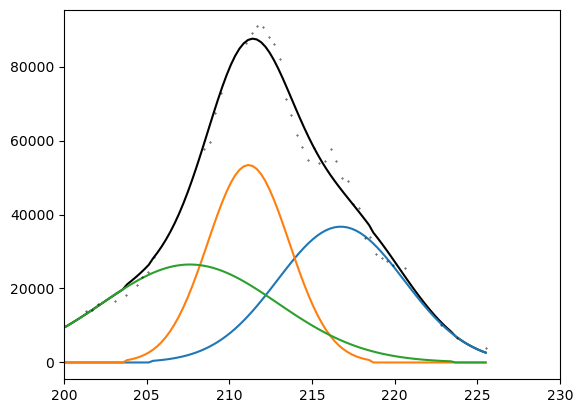

,0,1,2
0,166.997,14.41,101127
1,181.407,14.0557,108754
2,166.997,14.41,107351


Area:  5287.202882195703


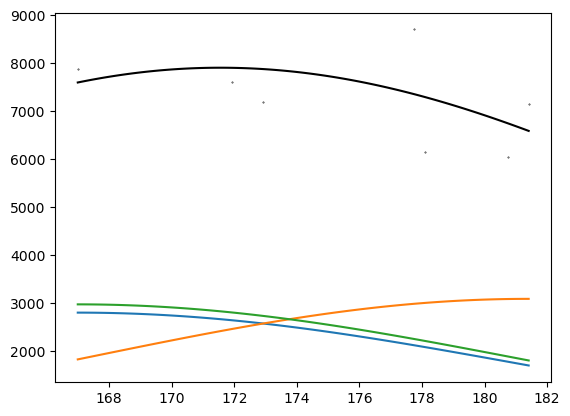

mz:  230.1275746701886
mz_std:  0.0001267617979714642
RT:  3.5184329128026195


,0,1,2
0,208.428,3.49848,693804
1,211.377,1.63695,408709
2,215.313,3.96241,1.20654e+06


Area:  38484.235048755894


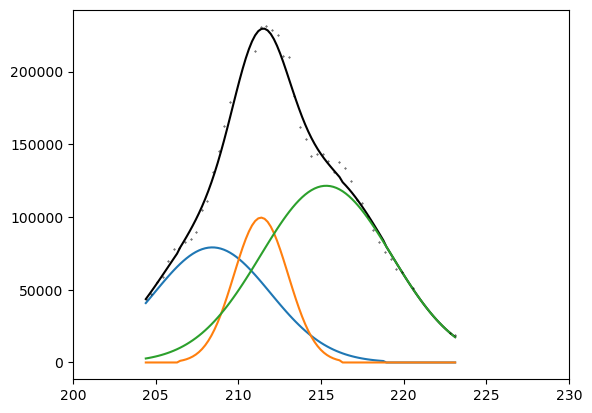

In [15]:
from ExtractAllPeaks import *
from ResolveFullChromatogram import *
PeaksIndex=O2OData.index
mz_window=1
RT_window=30
for peak_id in PeaksIndex[35:37]:
    mz_1=O2OData['AverageMZ_1'][peak_id]
    print('mz: ',mz_1)
    mz_std_1=O2OData['StdMZ_1'][peak_id]
    print('mz_std: ',mz_std_1)
    RT_1=O2OData['AverageRT_1'][peak_id]*60
    print('RT: ',RT_1/60)
    min_mz=mz_1-mz_window
    max_mz=mz_1+mz_window
    min_RT=RT_1-RT_window
    max_RT=RT_1+RT_window
    AllPeaks=ExtractAllPeaks(MS1IDVec=MS1IDVec,DataSet=DataSet,height=1e2,distance=2,min_RT=min_RT,max_RT=max_RT,min_mz=min_mz,max_mz=max_mz)
    GaussianParametersList=ResolveFullChromatogram(mz=mz_1,mz_std=mz_std_1,AllPeaks=AllPeaks,stdDistance=3,RT_tol=5,minSignals=5,SavePeaks=False)
    #plt.xlim([200,230])
    for Peak in GaussianParametersList:
        Chromatogram=Peak[1]
        GaussianParameters=Peak[0]
        ShowDF(GaussianParameters)
        print('Area: ',sum(GaussianParameters[:,2])/60)
        min_RT=min(Chromatogram[:,2])
        max_RT=max(Chromatogram[:,2])
        RT_vec=np.linspace(min_RT,max_RT,100)
        ChromatogramMatrix=OverlappingGaussPeaks(RT_vec=RT_vec,ParametersMat=GaussianParameters)
        plt.plot(RT_vec,sum(ChromatogramMatrix.T),'k-')          
        plt.plot(RT_vec,(ChromatogramMatrix))    
        plt.plot(Chromatogram[:,2],Chromatogram[:,1],'k.',ms=0.7)    
        plt.show()

In [3]:
from ExtractAllRawPeaks import *
AllRawPeaks=ExtractAllRawPeaks(MS1IDVec=MS1IDVec,DataSet=DataSet,height=1e2,distance=2,min_RT=0,max_RT=1200,min_mz=265,max_mz=270)

In [4]:
from ResolveChromPeaks import *
mz=267.1709
mz_std=0.002167899383078836
AllChromPeaksMat=ResolveChromPeaks(mz,mz_std,AllRawPeaks,stdDistance=3,RT_tol=5,minSignals=5,SavePeaks=True,mz_name='mz',ChromPoints=100,prominence=5,distance=5)

/home/edwin/0-GitHubProjects/Codding/feat.-ms2-Gauss/Functions/ResolveChromPeaks.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  AllChromPeaksMat=np.array(AllChromPeaks)


In [5]:
ShowDF(AllChromPeaksMat)

/home/edwin/anaconda3/lib/python3.7/site-packages/tabulate/__init__.py:107: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  (len(row) >= 1 and row[0] == SEPARATING_LINE)
/home/edwin/anaconda3/lib/python3.7/site-packages/tabulate/__init__.py:108: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  or (len(row) >= 2 and row[1] == SEPARATING_LINE)


,0,1,2,3
0,89.1457,86.5638,95.6024,8.96444e+06
1,96.6141,90.7829,102.355,977787
2,116.897,114.74,119.275,411088
3,119.119,115.398,126.253,252241
4,233.726,225.432,241.854,670529
5,238.248,235.403,244.355,786786
6,244.278,238.61,253.393,509601
7,251.439,243.848,259.087,440852
8,258.223,250.417,266.212,1.05374e+06
9,263.876,260.262,267.827,1.37493e+06
